In [1]:
import numpy as np
from scipy.special import factorial
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Define the function to minimize
def f(x, n):
    if n == 0:
        return x - 3  # Handle the case when n = 0 to avoid log(0)
    return x - 3 - np.log((x**n) / factorial(n))

# Function to minimize to 0
def minimize_to_zero(n, start=None, step=0.01, max_iterations=1000):
    if start is None:
        start = n  # Start from x = n if not provided
    
    x = start
    for _ in range(max_iterations):
        value = f(x, n)
        
        # Check for convergence
        if np.isclose(value, 0, atol=1e-6):  # If f(x) is close to zero
            break
        
        # Update x
        x -= step * np.sign(value)  # Move in the direction to minimize f(x)
    
    return x

In [3]:
# Example usage
n = 19  # Set your value for n
optimal_x = minimize_to_zero(n)

#print(f"The value of x that minimizes the function to 0 is: {optimal_x:.4f}")
print(f"Optimal x for n = {n}: {optimal_x:.4f}")

Optimal x for n = 19: 24.2000


In [4]:
# Value of N_avg
x_val = [3, 4.5, 5.84, 7.08, 8.28, 9.44, 10.56, 11.68, 12.78, 13.86, 14.92, 15.98, 17.04, 18.08, 19.12, 20.14, 21.16, 22.18, 23.2, 24.2]

#Value of N
n_val = np.arange(0, 20)


Fitted parameters:
A = 1.309083119357735, B = -0.01070070096652409


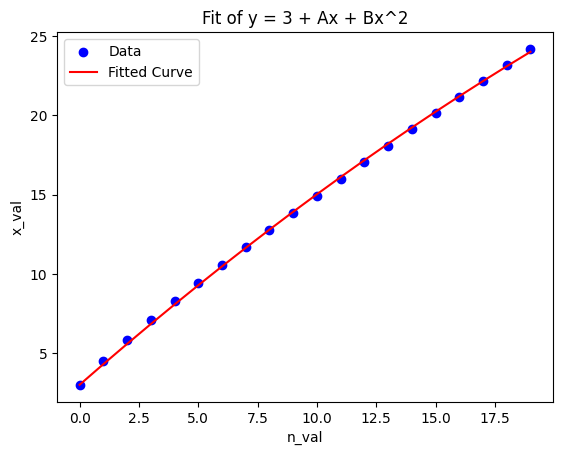

In [5]:
# Fitting of data

# Define the function to fit
def model_function(x, A, B):
    return 3 + A * x + B * x**2

# Given data
#x_val = np.array([3, 4.5, 5.84, 7.08, 8.28, 9.44, 10.56, 11.68, 12.78, 13.86, 14.92, 15.98, 17.04, 18.08, 19.12, 20.14, 21.16, 22.18, 23.2, 24.2])
#n_val = np.arange(0, 20)

# Fit the model
def fit_model(x_data, y_data):
    # Perform the curve fitting
    popt, pcov = curve_fit(model_function, x_data, y_data)
    return popt  # Return the optimal parameters (A, B)

# Fit the model to the data
params = fit_model(n_val, x_val)
A, B = params

print(f"Fitted parameters:\nA = {A}, B = {B}")

# Optional: Plot the data and the fitted curve
plt.scatter(n_val, x_val, label='Data', color='blue')
plt.plot(n_val, model_function(n_val, *params), label='Fitted Curve', color='red')
plt.xlabel('n_val')
plt.ylabel('x_val')
plt.title('Fit of y = 3 + Ax + Bx^2')
plt.legend()
plt.show()
